# Building the Circuit

In [1]:
import qiskit

In [2]:
qiskit.__qiskit_version__ # To check the version of the installed Qiskit package

C:\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=True,
C:\Anaconda3\lib\site

{'qiskit-terra': '0.17.2', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.12.3', 'qiskit-aqua': '0.9.1', 'qiskit': '0.25.4', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [3]:
pip install qiskit-ibmq-provider #used to install the Qiskit IBM Quantum Provider package

Invalid requirement: '#used'



Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install qiskit-aer #Qiskit Aer provides a high-performance simulator for quantum circuits

Invalid requirement: '#Qiskit'



Note: you may need to restart the kernel to use updated packages.


In [5]:
from qiskit import IBMQ #That provides tools for working with IBM Quantum systems

Save the IBM Quantum Experience API token, which is required to authenticate and access IBM's quantum devices and simulators.

In [6]:
IBMQ.save_account('b2d7c5a2c1f8bbe8347f55120f6795383386b33612498ffc368c80229b71d4a566d9164426107f27471e2fac595b39c35abeb855f9a343d0238525592d65a766')

configrc.store_credentials:WARNING:2024-03-07 15:18:44,027: Credentials already present. Set overwrite=True to overwrite.


In [7]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [8]:
pip install all pylatexenc #Python library for processing and converting LaTeX documents

Invalid requirement: '#Python'



Note: you may need to restart the kernel to use updated packages.


In [9]:
from qiskit import *
from qiskit.visualization import plot_histogram

In [10]:
circuit = QuantumCircuit(1)

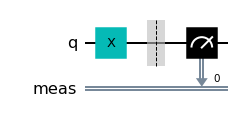

In [11]:
circuit.x(0)
# Measure the qubit
circuit.measure_all()

circuit.draw(output='mpl')

Measurement results: {'1': 1024}


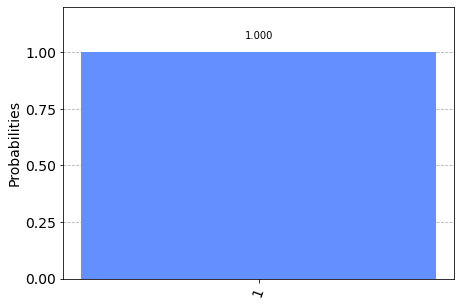

In [12]:
# Run the quantum circuit on the simulator
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()
counts = result.get_counts(circuit)

# Display the measurement results
print("Measurement results:", counts)
plot_histogram(counts)

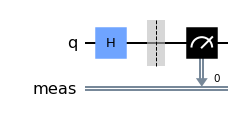

In [39]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

# Create a quantum circuit with a single qubit
qc = QuantumCircuit(1)

# Apply the Hadamard gate to the qubit
qc.h(0)

# Measure the qubit
qc.measure_all()
qc.draw(output= 'mpl')



Measurement results: {'0': 507, '1': 517}


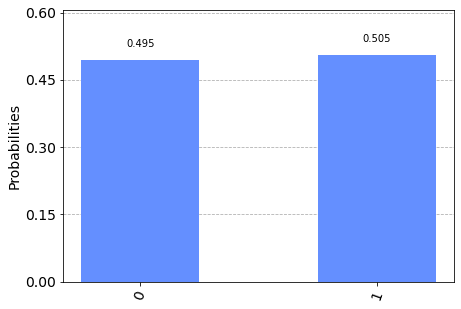

In [40]:
# Run the quantum circuit on the simulator
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()
counts = result.get_counts(qc)

# Display the measurement results
print("Measurement results:", counts)
plot_histogram(counts)

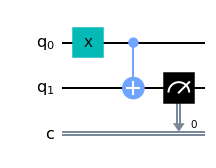

In [17]:
circuit = QuantumCircuit(2, 1)

circuit.x(0)
circuit.cx(0, 1)
circuit.measure([1], [0])
circuit.draw(output= 'mpl')

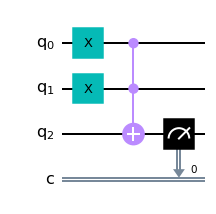

In [18]:
circuit = QuantumCircuit(3, 1)

circuit.x(0)
circuit.x(1)
circuit.ccx(0, 1, 2)
circuit.measure([2], [0])
circuit.draw(output= 'mpl')

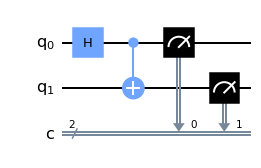

In [19]:
from qiskit import *

circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0, 1) # order is control, target

# qubits [0,1] are measured and results are stored in classical bits [0,1]
circuit.measure([0,1], [0,1])
circuit.draw(output= 'mpl')

# Running on a simulator

In [20]:
simulator = Aer.get_backend('qasm_simulator') #Results in terms of measurement outcomes and probabilities.

In [21]:
# Execute the circuit on the simulator
result = execute(circuit, backend=simulator).result() 

plot_histogram function is used to visualize the measurement outcomes obtained from running the quantum circuit

In [22]:
from qiskit.visualization import plot_histogram

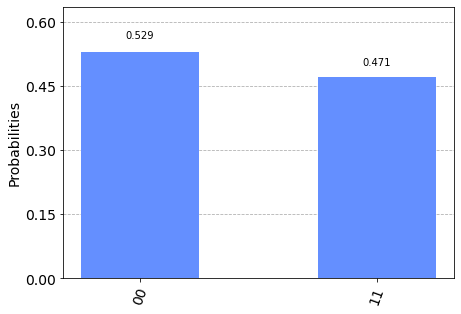

In [23]:
plot_histogram(result.get_counts(circuit)) #getting the counts specifically for the measurements of the provided circuit

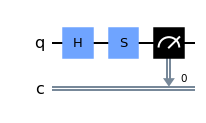

In [24]:
circuit = QuantumCircuit(1, 1)

circuit.h(0)
circuit.s(0)
circuit.measure([0], [0])
circuit.draw(output = 'mpl')

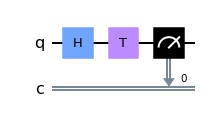

In [25]:
circuit = QuantumCircuit(1, 1)

circuit.h(0)
circuit.t(0)
circuit.measure([0], [0])
circuit.draw(output = 'mpl')

# Implementaion of XOR, AND, NAND, OR

In [26]:
from qiskit import qiskit, QuantumCircuit
from qiskit import *
%matplotlib inline

#Use the execute function to evaluate and print the results of another function func for different input combinations.
def execute(func):
    print('0 0: {}'.format(func(0, 0)))
    print('0 1: {}'.format(func(0, 1)))
    print('1 0: {}'.format(func(1, 0)))
    print('1 1: {}'.format(func(1, 1)))

The function xor(a, b) defines a quantum circuit using Qiskit that simulates 
the XOR (exclusive or) operation on two classical bits (a and b).

In [27]:
def xor(a, b):
    # Create a quantum circuit with 3 qubits and 1 classical bit
    qc1 = QuantumCircuit(3, 1)
    
    # Set up the registers based on input values a and b
    # The inputs a and b are represented by the qubits at indices 0 and 1.
         #If a is true (1), an X gate is applied to the first qubit (qc.x(0)).
         #If b is true (1), an X gate is applied to the second qubit (qc.x(1)).
            
    if a:
        qc1.x(0)
    if b:
        qc1.x(1)

    qc1.barrier()

    # XOR operation using controlled-X gates
    
    qc1.cx(0, 2)
    qc1.cx(1, 2)

    qc1.barrier()

    # Measure the result qubit and store it in the classical bit
    qc1.measure(2, 0)
    print(qc1)

    # Execute the circuit on the qasm_simulator backend
    job = qiskit.execute(qc1, qiskit.BasicAer.get_backend('qasm_simulator'))

    # Return the counts of measurement outcomes
    return job.result().get_counts()


In [28]:
print('XOR')
execute(xor)

XOR
      ░            ░    
q_0: ─░───■────────░────
      ░   │        ░    
q_1: ─░───┼────■───░────
      ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐
q_2: ─░─┤ X ├┤ X ├─░─┤M├
      ░ └───┘└───┘ ░ └╥┘
c: 1/═════════════════╩═
                      0 
0 0: {'0': 1024}
           ░            ░    
q_0: ──────░───■────────░────
     ┌───┐ ░   │        ░    
q_1: ┤ X ├─░───┼────■───░────
     └───┘ ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐
q_2: ──────░─┤ X ├┤ X ├─░─┤M├
           ░ └───┘└───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0 
0 1: {'1': 1024}
     ┌───┐ ░            ░    
q_0: ┤ X ├─░───■────────░────
     └───┘ ░   │        ░    
q_1: ──────░───┼────■───░────
           ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐
q_2: ──────░─┤ X ├┤ X ├─░─┤M├
           ░ └───┘└───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0 
1 0: {'1': 1024}
     ┌───┐ ░            ░    
q_0: ┤ X ├─░───■────────░────
     ├───┤ ░   │        ░    
q_1: ┤ X ├─░───┼────■───░────
     └───┘ ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐
q_2: ──────░─┤ X ├┤ X ├─░─┤M├


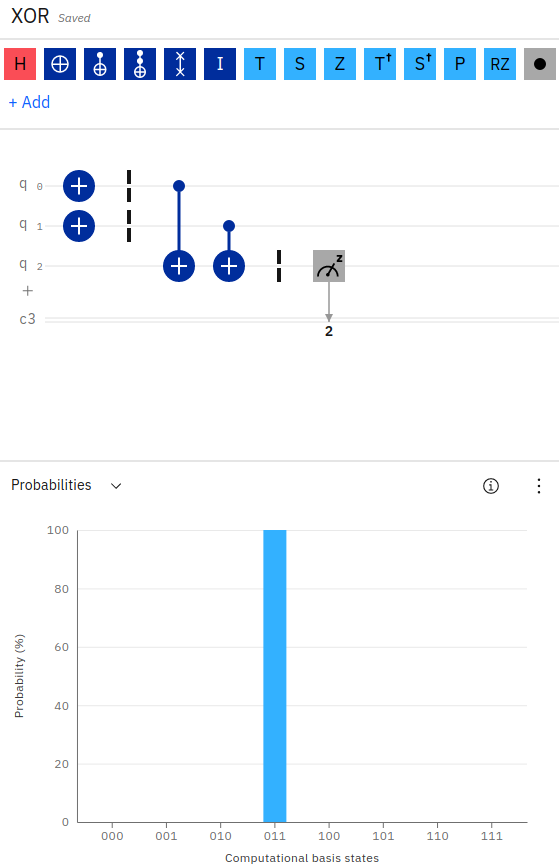

In [29]:
def and_gate(a, b):
    # Create a quantum circuit with 3 qubits and 1 classical bit
    qc = QuantumCircuit(3, 1)
    
    # Set up the registers based on input values a and b
    # The inputs a and b are represented by the qubits at indices 0 and 1.
         #If a is true (1), an X gate is applied to the first qubit (qc.x(0)).
         #If b is true (1), an X gate is applied to the second qubit (qc.x(1)).
            
    if a:
        qc.x(0)
    if b:
        qc.x(1)

    qc.barrier()


    #The AND operation is implemented using a controlled-controlled-X (Toffoli) gate
    qc.ccx(0, 1, 2)

    qc.barrier()

    # Measure the result qubit and store it in the classical bit
    qc.measure(2, 0)
    print(qc)

    # Execute the circuit on the qasm_simulator backend
    job = qiskit.execute(qc, qiskit.BasicAer.get_backend('qasm_simulator'))

    # Return the counts of measurement outcomes
    return job.result().get_counts()



In [30]:
print('AND')
execute(and_gate)

AND
      ░       ░    
q_0: ─░───■───░────
      ░   │   ░    
q_1: ─░───■───░────
      ░ ┌─┴─┐ ░ ┌─┐
q_2: ─░─┤ X ├─░─┤M├
      ░ └───┘ ░ └╥┘
c: 1/════════════╩═
                 0 
0 0: {'0': 1024}
           ░       ░    
q_0: ──────░───■───░────
     ┌───┐ ░   │   ░    
q_1: ┤ X ├─░───■───░────
     └───┘ ░ ┌─┴─┐ ░ ┌─┐
q_2: ──────░─┤ X ├─░─┤M├
           ░ └───┘ ░ └╥┘
c: 1/═════════════════╩═
                      0 
0 1: {'0': 1024}
     ┌───┐ ░       ░    
q_0: ┤ X ├─░───■───░────
     └───┘ ░   │   ░    
q_1: ──────░───■───░────
           ░ ┌─┴─┐ ░ ┌─┐
q_2: ──────░─┤ X ├─░─┤M├
           ░ └───┘ ░ └╥┘
c: 1/═════════════════╩═
                      0 
1 0: {'0': 1024}
     ┌───┐ ░       ░    
q_0: ┤ X ├─░───■───░────
     ├───┤ ░   │   ░    
q_1: ┤ X ├─░───■───░────
     └───┘ ░ ┌─┴─┐ ░ ┌─┐
q_2: ──────░─┤ X ├─░─┤M├
           ░ └───┘ ░ └╥┘
c: 1/═════════════════╩═
                      0 
1 1: {'1': 1024}


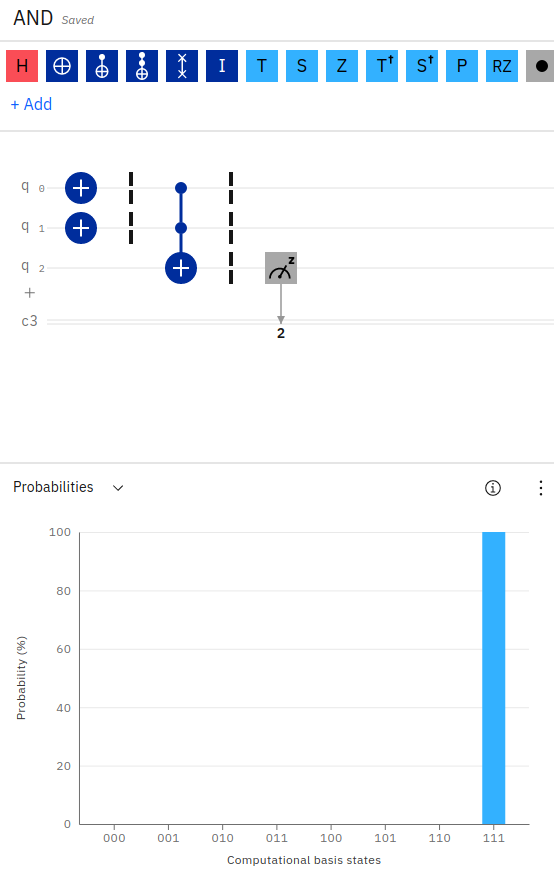

In [31]:
def nand(a, b):
    # Create a quantum circuit with 3 qubits and 1 classical bit
    qc = QuantumCircuit(3, 1)

    # Set up the registers based on input values a and b
    if a:
        qc.x(0)
    if b:
        qc.x(1)
    
    qc.barrier()

    # NAND operation using a controlled-controlled-X (Toffoli) gate and X gate
    qc.ccx(0, 1, 2)
    qc.x(2)

    qc.barrier()

    # Measure the result qubit and store it in the classical bit
    qc.measure(2, 0)
    print(qc)

    # Execute the circuit on the qasm_simulator backend
    job = qiskit.execute(qc, qiskit.BasicAer.get_backend('qasm_simulator'))

    # Return the counts of measurement outcomes
    return job.result().get_counts()


In [32]:
print('NAND')
execute(nand)

NAND
      ░            ░    
q_0: ─░───■────────░────
      ░   │        ░    
q_1: ─░───■────────░────
      ░ ┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─░─┤ X ├┤ X ├─░─┤M├
      ░ └───┘└───┘ ░ └╥┘
c: 1/═════════════════╩═
                      0 
0 0: {'1': 1024}
           ░            ░    
q_0: ──────░───■────────░────
     ┌───┐ ░   │        ░    
q_1: ┤ X ├─░───■────────░────
     └───┘ ░ ┌─┴─┐┌───┐ ░ ┌─┐
q_2: ──────░─┤ X ├┤ X ├─░─┤M├
           ░ └───┘└───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0 
0 1: {'1': 1024}
     ┌───┐ ░            ░    
q_0: ┤ X ├─░───■────────░────
     └───┘ ░   │        ░    
q_1: ──────░───■────────░────
           ░ ┌─┴─┐┌───┐ ░ ┌─┐
q_2: ──────░─┤ X ├┤ X ├─░─┤M├
           ░ └───┘└───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0 
1 0: {'1': 1024}
     ┌───┐ ░            ░    
q_0: ┤ X ├─░───■────────░────
     ├───┤ ░   │        ░    
q_1: ┤ X ├─░───■────────░────
     └───┘ ░ ┌─┴─┐┌───┐ ░ ┌─┐
q_2: ──────░─┤ X ├┤ X ├─░─┤M├

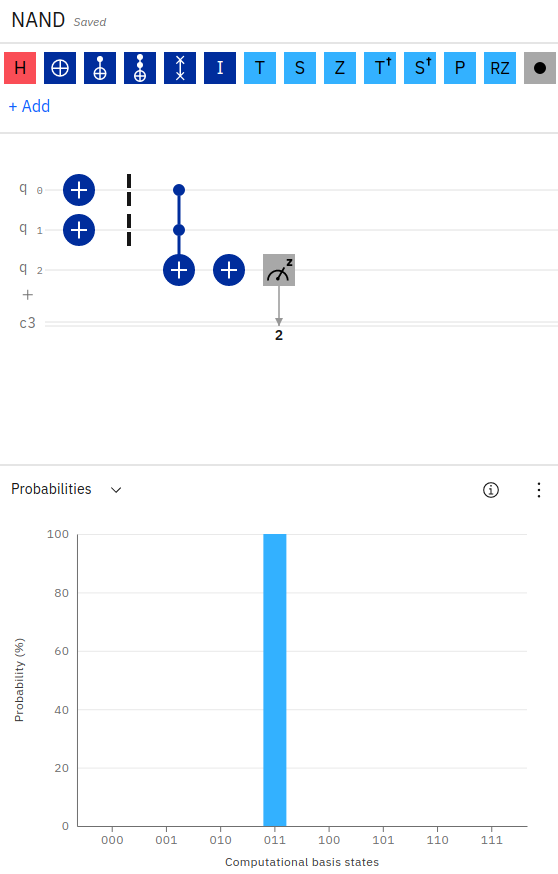

In [33]:
def or_gate(a, b):
    # Create a quantum circuit with 3 qubits and 1 classical bit
    qc = QuantumCircuit(3, 1)

    # Set up the registers based on input values a and b
    if a:
        qc.x(0)
    if b:
        qc.x(1)

    qc.barrier()

    # OR operation using controlled-X and controlled-controlled-X gates
    qc.cx(0, 2)   # If the first bit is 1, flip the result bit to 1. Otherwise, leave it as 0.
    qc.cx(1, 2)   # If the second bit is 1, flip the result bit again (to 0 if the first is 1, or 1 if the first is 0). Otherwise, leave it as-is.
    qc.ccx(0, 1, 2)  # If both bits are 1, flip the result bit one more time.

    qc.barrier()

    # Measure the result qubit and store it in the classical bit
    qc.measure(2, 0)
    print(qc)

    # Execute the circuit on the qasm_simulator backend
    job = qiskit.execute(qc, qiskit.BasicAer.get_backend('qasm_simulator'))

    # Return the counts of measurement outcomes
    return job.result().get_counts()

In [34]:
print('OR')
execute(or_gate)

OR
      ░                 ░    
q_0: ─░───■─────────■───░────
      ░   │         │   ░    
q_1: ─░───┼────■────■───░────
      ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ ┌─┐
q_2: ─░─┤ X ├┤ X ├┤ X ├─░─┤M├
      ░ └───┘└───┘└───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0 
0 0: {'0': 1024}
           ░                 ░    
q_0: ──────░───■─────────■───░────
     ┌───┐ ░   │         │   ░    
q_1: ┤ X ├─░───┼────■────■───░────
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ ┌─┐
q_2: ──────░─┤ X ├┤ X ├┤ X ├─░─┤M├
           ░ └───┘└───┘└───┘ ░ └╥┘
c: 1/═══════════════════════════╩═
                                0 
0 1: {'1': 1024}
     ┌───┐ ░                 ░    
q_0: ┤ X ├─░───■─────────■───░────
     └───┘ ░   │         │   ░    
q_1: ──────░───┼────■────■───░────
           ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ ┌─┐
q_2: ──────░─┤ X ├┤ X ├┤ X ├─░─┤M├
           ░ └───┘└───┘└───┘ ░ └╥┘
c: 1/═══════════════════════════╩═
                                0 
1 0: {'1': 1024}
     ┌───┐ ░                 ░    
q_0: ┤ X ├─

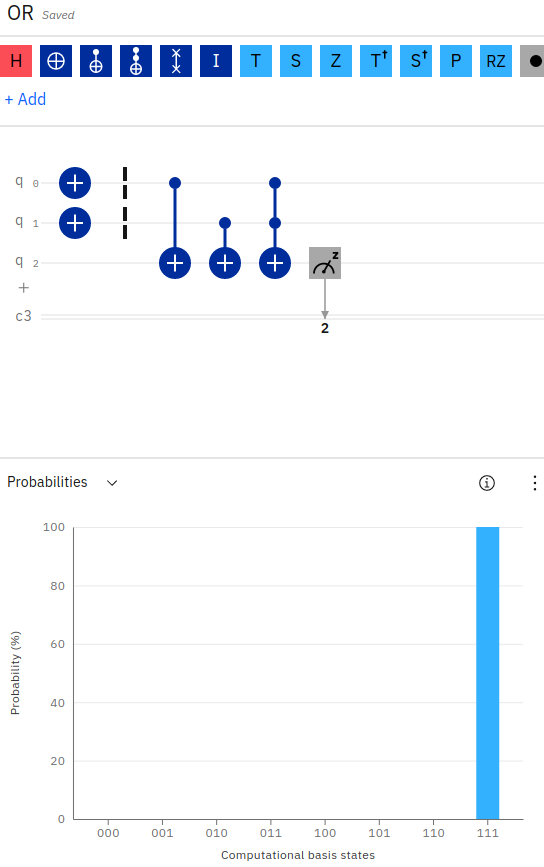

# Implementation of HALF ADDER and FULL ADDER

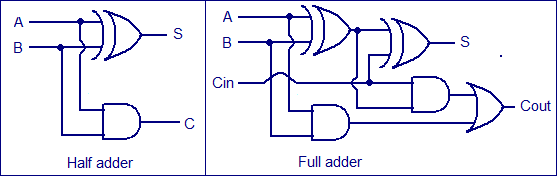

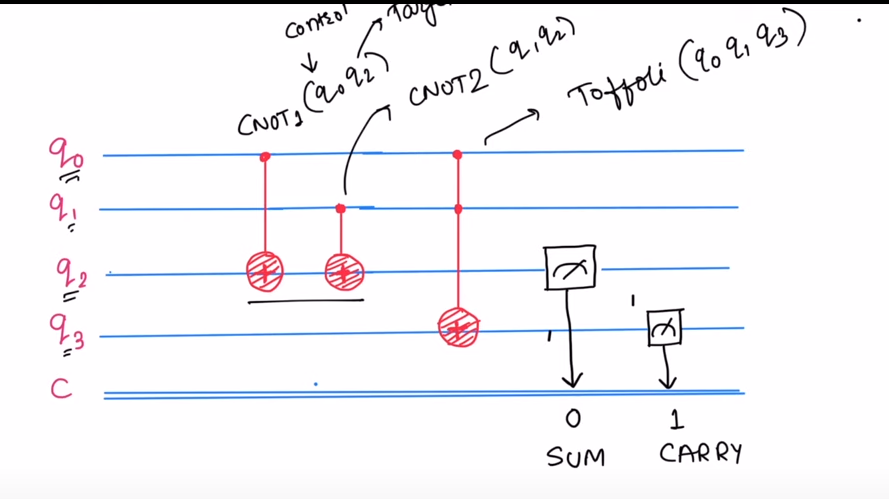

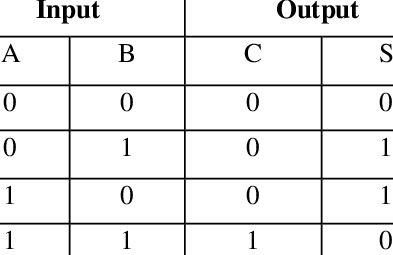

                          
q_0: ──■─────────■────────
       │         │        
q_1: ──┼────■────■────────
     ┌─┴─┐┌─┴─┐  │  ┌─┐   
q_2: ┤ X ├┤ X ├──┼──┤M├───
     └───┘└───┘┌─┴─┐└╥┘┌─┐
q_3: ──────────┤ X ├─╫─┤M├
               └───┘ ║ └╥┘
c: 2/════════════════╩══╩═
                     0  1 
Input: 0 + 0
Measurement results: {'00': 1000}


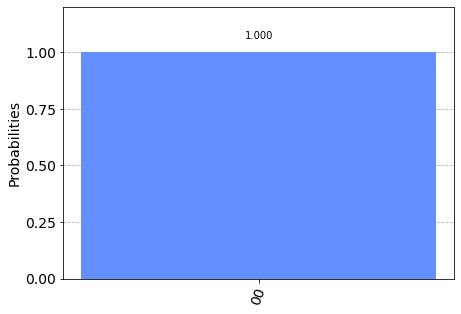

In [35]:
from qiskit import QuantumCircuit, Aer, transpile, assemble

def run_quantum_circuit(circuit, shots=1000):
    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(circuit, simulator)
    result = simulator.run(compiled_circuit, shots=shots).result()
    counts = result.get_counts(circuit)
    return counts

def quantum_adder(input1, input2):
    # Create a quantum circuit with 4 qubits (2 inputs, 1 sum, 1 carry)
    adder_circuit = QuantumCircuit(4, 2)

    # Encode the input bits
    if input1:
        adder_circuit.x(0)
    if input2:
        adder_circuit.x(1)

    # Apply XOR gate for the sum
    adder_circuit.cx(0, 2)
    adder_circuit.cx(1, 2)

    # Apply AND gate for the carry
    adder_circuit.ccx(0, 1, 3)

    # Measure the sum and carry qubits
    adder_circuit.measure([2, 3], [0, 1])

    print(adder_circuit)

    return adder_circuit

# Example usage
input1 = 0  # First input bit 
input2 = 0 # Second input bit

# Create and run the quantum adder circuit
adder_circuit = quantum_adder(input1, input2)
counts = run_quantum_circuit(adder_circuit)


# Display the measurement results
print(f"Input: {input1} + {input2}")
print("Measurement results:", counts) # Carry Sum
from qiskit.visualization import plot_histogram
plot_histogram(counts)


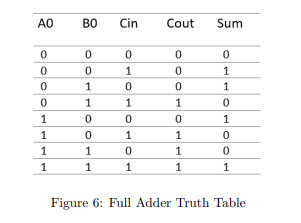

In [36]:
from qiskit import QuantumCircuit, Aer, transpile, assemble

def run_quantum_circuit(circuit, shots=1000):
    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(circuit, simulator)
    result = simulator.run(compiled_circuit, shots=shots).result()
    counts = result.get_counts(circuit)
    return counts

def quantum_adder(input1, input2, input3):
    # Creating a circuit with 8 quantum bits and 2 classical bits
    qc = QuantumCircuit(8,2)

    # Set up the registers
    if input1:
        qc.x(0)
    if input2:
        qc.x(1)
    if input3:
        qc.x(2)
    qc.barrier()

    # AND gate1 implementation
    qc.ccx(0,1,3)
    qc.barrier()

    # OR gate1 implementation
    qc.cx(0,4) 
    qc.cx(1,4)
    qc.barrier()

    # OR gate2 implementation
    qc.cx(2,5) 
    qc.cx(4,5)
    qc.barrier()

    # AND gate2 implementation
    qc.ccx(2,4,6)
    qc.barrier()

    # OR gate implementation
    qc.x(3)
    qc.x(6)
    qc.ccx(3,6,7)
    qc.x(7)
    qc.barrier()

    # Measuring and put result to classical bit
    qc.measure(5,0) # ( sum )
    qc.measure(7,1) # ( carry-out )
    print(qc)


    return qc

# Example usage
input1 = 0  # First input bit 
input2 = 1 # Second input bit
cin = 1
# Create and run the quantum adder circuit
adder_circuit = quantum_adder(input1, input2, cin)
counts = run_quantum_circuit(adder_circuit)


# Display the measurement results
print(f"Input: {input1} + {input2} + {cin}")
print("Measurement results:", counts) # Carry Sum

           ░       ░            ░            ░       ░                 ░       
q_0: ──────░───■───░───■────────░────────────░───────░─────────────────░───────
     ┌───┐ ░   │   ░   │        ░            ░       ░                 ░       
q_1: ┤ X ├─░───■───░───┼────■───░────────────░───────░─────────────────░───────
     ├───┤ ░   │   ░   │    │   ░            ░       ░                 ░       
q_2: ┤ X ├─░───┼───░───┼────┼───░───■────────░───■───░─────────────────░───────
     └───┘ ░ ┌─┴─┐ ░   │    │   ░   │        ░   │   ░ ┌───┐           ░       
q_3: ──────░─┤ X ├─░───┼────┼───░───┼────────░───┼───░─┤ X ├──■────────░───────
           ░ └───┘ ░ ┌─┴─┐┌─┴─┐ ░   │        ░   │   ░ └───┘  │        ░       
q_4: ──────░───────░─┤ X ├┤ X ├─░───┼────■───░───■───░────────┼────────░───────
           ░       ░ └───┘└───┘ ░ ┌─┴─┐┌─┴─┐ ░   │   ░        │        ░ ┌─┐   
q_5: ──────░───────░────────────░─┤ X ├┤ X ├─░───┼───░────────┼────────░─┤M├───
           ░       ░            ░ └───┘└

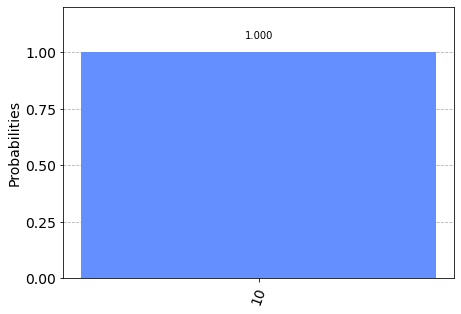

In [37]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

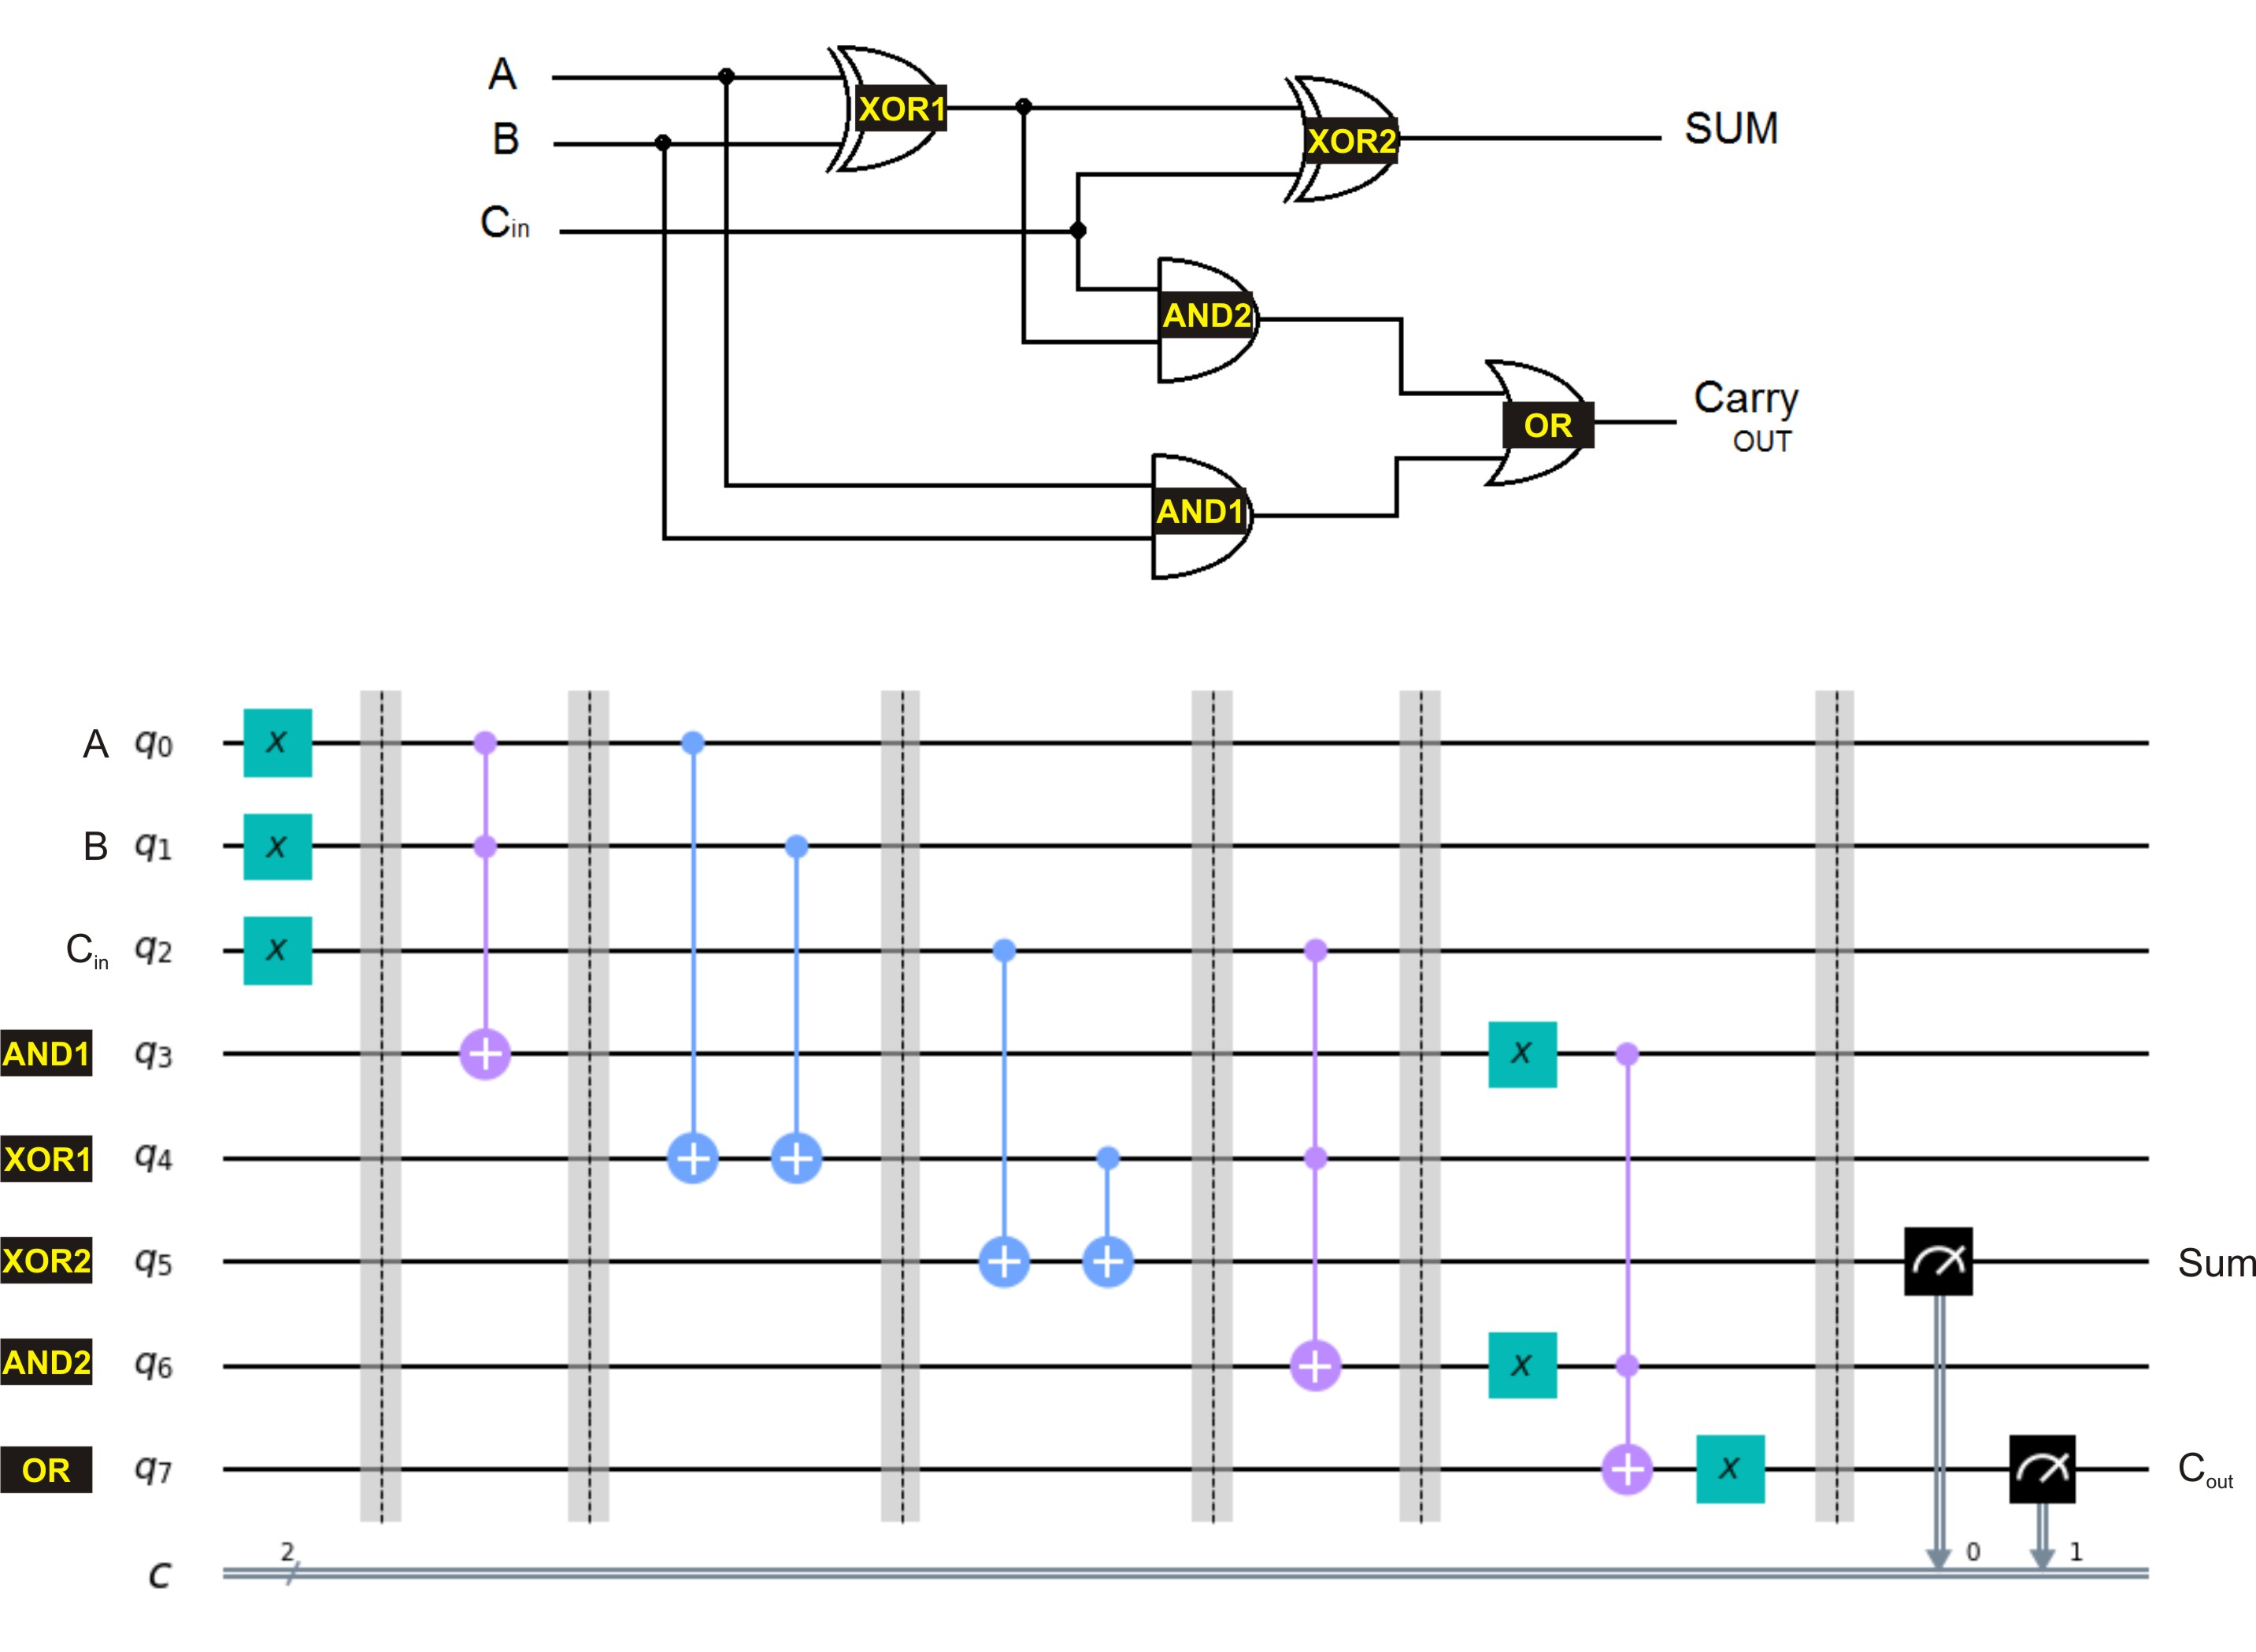

# Running on real quantum hardware

In [38]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')

ibmqfactory.load_account:WARNING:2024-03-07 15:19:36,984: Credentials are already in use. The existing account in the session will be replaced.


In [ ]:
#least busy backend
num_qubits = 2

from qiskit.providers.ibmq import least_busy
possible_devices = provider.backends(filters=lambda x: 
                                     x.configuration().n_qubits >= num_qubits
                                       and 
                                     x.configuration().simulator == False)
qcomp = least_busy(possible_devices)
print(qcomp)

In [ ]:
import qiskit.tools.jupyter
%qiskit_job_watcher

In [ ]:
job = execute(circuit, backend=qcomp)

In [ ]:
# monitor the job progress inline
from qiskit.tools.monitor import job_monitor
job_monitor(job)

In [ ]:
result = job.result()
plot_histogram(result.get_counts(circuit))

In [ ]:
%qiskit_disable_job_watcher